In [ ]:
import pandas as pd

test_data = pd.read_parquet("./data/data/test_data.parquet", engine="fastparquet")
test_data.info()

In [ ]:
test_data.head()

In [ ]:
test_data["source_idx"].nunique()

In [ ]:
test_v2 = pd.read_parquet("./data/test/test-v2.parquet", engine="fastparquet")
test_v2.info()

In [ ]:
test_v3 = test_v2[~(test_v2["source_code_with_deepseek_output"].str.contains("import", regex=False))]


In [ ]:
test_v3.info()

In [ ]:
test_v3.reset_index(drop=True, inplace=True)

In [ ]:
test_v3.to_parquet("./data/test/test-v3.parquet")

In [13]:
import pandas as pd
def view(path):
    df = pd.read_parquet(path, engine="fastparquet")
    print(df.info())
    print(df.head())

In [75]:
view("/home/hieuvd/lvdthieu/CodeGen/data/data/test_data.parquet")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51015 entries, 0 to 51014
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   source_idx        51015 non-null  object
 1   contract_name     51015 non-null  object
 2   func_name         47879 non-null  object
 3   masked_contract   51015 non-null  object
 4   func_body         51015 non-null  object
 5   func_requirement  51015 non-null  object
dtypes: object(6)
memory usage: 2.3+ MB
None
  source_idx contract_name      func_name  \
0          0          KKNK           KKNK   
1          0          KKNK       transfer   
2          0          KKNK        approve   
3          0          KKNK   transferFrom   
4          0          KKNK  withdrawEther   
5          0          KKNK                  
6          1    BasicToken    totalSupply   
7          1    BasicToken       transfer   
8          1    BasicToken      balanceOf   
9          1       Ownable   

In [76]:
test_data = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/data/test_data.parquet", engine="fastparquet")
test_data["source_idx"] = test_data["source_idx"].apply(lambda x: int(x))
test_data["source_idx"].describe()

count    51015.000000
mean      4386.571812
std       2534.794551
min          0.000000
25%       2136.000000
50%       4391.000000
75%       6592.000000
max       8743.000000
Name: source_idx, dtype: float64

In [99]:
test = test_data.groupby(["source_idx", "contract_name"]).size().reset_index().rename(columns={0: "count"})
test

,source_idx,contract_name,count
0,0,KKNK,6
1,1,BasicToken,3
2,1,Claimable,2
3,1,Ownable,2
4,1,StacsToken,4
...,...,...,...
9565,8738,TeuToken,1
9566,8738,teuInitialTokenSale,24
9567,8740,GodMode,3
9568,8743,ERC20,18


In [93]:
test_file = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/solfile-v3/test_file.parquet", engine="fastparquet")
test_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8744 entries, 0 to 12077
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source_code  8744 non-null   object
dtypes: object(1)
memory usage: 136.6+ KB


In [94]:
test_file.reset_index(drop=True, inplace=True)

In [95]:
with open("check.sol", "w") as f:
    f.write(test_file.loc[5203, "source_code"])

In [96]:
test_file.to_parquet("/home/hieuvd/lvdthieu/CodeGen/data/solfile-v3/test_file.parquet", engine="fastparquet")

In [100]:
view("/home/hieuvd/lvdthieu/CodeGen/data/solfile-v3/train_file.parquet")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85544 entries, 0 to 85543
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source_code  85544 non-null  object
dtypes: object(1)
memory usage: 668.4+ KB
None
                                         source_code
0  pragma solidity ^0.4.20;\r\n\r\nlibrary SafeMa...
1  // SPDX-License-Identifier: UNLICENSED\r\n\r\n...
2  // SPDX-License-Identifier: GPL-3.0-or-later\n...
3  pragma solidity ^0.8.0;\r\n\r\ninterface IERC2...
4  pragma solidity ^0.4.24;\r\n// This contract h...
5  pragma solidity ^0.4.17;\r\n\r\n contract toke...
6  /**\r\n *Submitted for verification at Ethersc...
7  //Join our Telegram: https://t.me/BigBCat\r\n\...
8  pragma solidity ^0.5.17;\r\n\r\n\r\nlibrary Sa...
9  /*\r\n\r\n\r\nhttps://t.me/stealthtokenofficia...


In [101]:
view("/home/hieuvd/lvdthieu/CodeGen/parser/out/result30.parquet")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16373 entries, 0 to 16372
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   source_idx        16373 non-null  object
 1   contract_name     16373 non-null  object
 2   func_name         15332 non-null  object
 3   masked_contract   16373 non-null  object
 4   func_body         16373 non-null  object
 5   func_requirement  16373 non-null  object
dtypes: object(6)
memory usage: 767.6+ KB
None
  source_idx contract_name       func_name  \
0      82708       Context      _msgSender   
1      82708        yVault       available   
2      82708        yVault        withdraw   
3      82709         Token     totalSupply   
4      82709         Token       balanceOf   
5      82709         Token        transfer   
6      82709         Token    transferFrom   
7      82709         Token         approve   
8      82709         Token       allowance   
9      82709     

In [102]:
train_file = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/data/train_data.parquet", engine="fastparquet")
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544319 entries, 0 to 544318
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   source_idx        544319 non-null  object
 1   contract_name     544319 non-null  object
 2   func_name         510238 non-null  object
 3   masked_contract   544319 non-null  object
 4   func_body         544319 non-null  object
 5   func_requirement  544319 non-null  object
dtypes: object(6)
memory usage: 24.9+ MB


In [103]:
train = train_file.groupby(["source_idx", "contract_name"]).size().reset_index().rename(columns={0: "count"})
train

,source_idx,contract_name,count
0,0,TangentStake,5
1,10,COVIDBots,3
2,10,ERC721,26
3,10003,SZUSDT,2
4,10012,ERC20,17
...,...,...,...
102602,9995,Ownable,4
102603,9995,Pausable,2
102604,9998,BonePaymentToken,6
102605,9998,ERC20,18


In [5]:
view("/home/hieuvd/lvdthieu/CodeGen/data/test/test_file.parquet")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8744 entries, 0 to 8743
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source_code  8744 non-null   object
dtypes: object(1)
memory usage: 68.4+ KB
None
                                         source_code
0  /**\r\n *Submitted for verification at Ethersc...
1  pragma solidity 0.4.25;\r\n\r\ncontract ERC20B...
2  pragma solidity >=0.4.22 <0.7.0;\r\n\r\nabstra...
3  pragma solidity 0.8.4;\r\n\r\n// SPDX-License-...
4  //* SVChain.org \r\n\r\npragma solidity ^0.4.2...
5  // SPDX-License-Identifier: MIT\r\n\r\npragma ...
6  pragma solidity ^0.4.18;\r\n/** --------------...
7  /*\r\n\r\n\r\nTelegram : https://t.me/goodluck...
8  /* ===========================================...
9  pragma solidity 0.6.12;\n\n/*\n    Owned contr...


In [6]:
dfs = []
for i in range(1, 31):
    dfs.append(pd.read_parquet(f"/home/hieuvd/lvdthieu/CodeGen/compilation/error/error{i}.parquet"))
len(dfs)

30

In [7]:
error = pd.concat(dfs, axis=0)
error.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3334 entries, 2 to 12074
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source_code  3334 non-null   object
 1   error        3334 non-null   object
dtypes: object(2)
memory usage: 78.1+ KB


In [10]:
error.head()

,source_code,error
index,,
2,contract Strategy is BaseStrategyInitializable...,Warning: SPDX license identifier not provided ...
13,contract ThisExternalAssembly {\r\n uint pu...,ParserError: Expected ';' but got '}'\n --> c...
20,pragma solidity ^0.5.2;\r\n\r\n\r\n\r\n/**\r\n...,contracts/sample.sol:17:19: DeclarationError: ...
24,pragma solidity ^0.8.0;\r\n/**\r\n * @dev Cont...,Warning: SPDX license identifier not provided ...
29,pragma solidity ^0.8.4;\r\n\r\n\r\n\r\n\r\n\r\...,Warning: SPDX license identifier not provided ...


In [11]:
error.loc[2, "error"]

'Warning: SPDX license identifier not provided in source file. Before publishing, consider adding a comment containing "SPDX-License-Identifier: <SPDX-License>" to each source file. Use "SPDX-License-Identifier: UNLICENSED" for non-open-source code. Please see https://spdx.org for more information.\n--> contracts/sample.sol\n\n\nWarning: Source file does not specify required compiler version! Consider adding "pragma solidity ^0.8.13;"\n--> contracts/sample.sol\n\n\nDeclarationError: Identifier not found or not unique.\n --> contracts/sample.sol:1:22:\n  |\n1 | contract Strategy is BaseStrategyInitializable {\n  |                      ^^^^^^^^^^^^^^^^^^^^^^^^^\n\n\nError HH600: Compilation failed\nHardhatError: HH600: Compilation failed\n    at SimpleTaskDefinition.action (/home/hieuvd/lvdthieu/CodeGen/compilation/compilers/hardhat1/node_modules/hardhat/src/builtin-tasks/compile.ts:499:15)\n    at Environment._runTaskDefinition (/home/hieuvd/lvdthieu/CodeGen/compilation/compilers/hardha

In [4]:
view("/home/hieuvd/lvdthieu/CodeGen/data/test/test_data.parquet")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51015 entries, 0 to 51014
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   source_idx        51015 non-null  object
 1   contract_name     51015 non-null  object
 2   func_name         47879 non-null  object
 3   masked_contract   51015 non-null  object
 4   func_body         51015 non-null  object
 5   func_requirement  51015 non-null  object
dtypes: object(6)
memory usage: 2.3+ MB
None
  source_idx contract_name      func_name  \
0          0          KKNK           KKNK   
1          0          KKNK       transfer   
2          0          KKNK        approve   
3          0          KKNK   transferFrom   
4          0          KKNK  withdrawEther   

                                     masked_contract  \
0  contract KKNK is SafeMath{\r\n    string publi...   
1  contract KKNK is SafeMath{\r\n    string publi...   
2  contract KKNK is SafeMath{\r\n    str

In [8]:
test_data = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/test/test_data.parquet")
test_data["source_idx"].nunique()

4508

In [2]:
import json
import pandas as pd

with open("/home/hieuvd/lvdthieu/CodeGen/data/test/test.jsonl", "r") as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11781 entries, 0 to 11780
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   file_name         11781 non-null  object
 1   file_address      11781 non-null  object
 2   contract_name     11781 non-null  object
 3   func_name         10691 non-null  object
 4   masked_contract   11781 non-null  object
 5   func_body         11781 non-null  object
 6   func_requirement  11781 non-null  object
 7   deepseek_output   11781 non-null  object
 8   finetune_output   11781 non-null  object
dtypes: object(9)
memory usage: 828.5+ KB


In [3]:
test_file_v1 = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/solfile/test_file.parquet", engine="fastparquet")

In [4]:
test_file_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18594 entries, 0 to 18593
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   file_name         18594 non-null  object
 1   file_address      18594 non-null  object
 2   source_code       18594 non-null  object
 3   abi               18594 non-null  object
 4   compiler_version  18594 non-null  object
 5   library           18594 non-null  object
dtypes: object(6)
memory usage: 871.7+ KB


In [5]:
test_file_v1 = test_file_v1[["file_name", "file_address", "source_code"]]

In [30]:
source_code = []
for i in range(len(df)):
    tmp = test_file_v1[(test_file_v1["file_name"] == df.loc[i, "file_name"]) &
                       (test_file_v1["file_address"] == df.loc[i, "file_address"])]["source_code"]
    if len(tmp) == 1:
        source_code.append(tmp.iloc[0])
    else:
        for j in range(len(tmp)):
            source = tmp.iloc[j]
            #  + df.loc[i, "func_body"] + masked_contract[start_of_function+20:]
            #  and contract in source
            if (df.loc[i, "contract_name"] in source and
                (df.loc[i, "func_name"] if df.loc[i, "func_name"] else "") in source and
                df.loc[i, "func_body"] in source):
                source_code.append(source)
                break
len(source_code)

11781

In [31]:
df["source_code"] = source_code

df.to_parquet("/home/hieuvd/lvdthieu/CodeGen/data/test/test_refine.parquet", engine="fastparquet")

In [3]:
test_cases = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/test/test_refine.parquet", engine="fastparquet")
test_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11781 entries, 0 to 11780
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   file_name         11781 non-null  object
 1   file_address      11781 non-null  object
 2   contract_name     11781 non-null  object
 3   func_name         10691 non-null  object
 4   masked_contract   11781 non-null  object
 5   func_body         11781 non-null  object
 6   func_requirement  11781 non-null  object
 7   deepseek_output   11781 non-null  object
 8   finetune_output   11781 non-null  object
 9   source_code       11781 non-null  object
dtypes: object(10)
memory usage: 920.5+ KB


In [39]:
len(test_cases[["contract_name", "func_name"]].drop_duplicates())

6267

In [32]:
cnt = 0
for i in range(1000):
    if test_cases.loc[i, "contract_name"] in test_cases.loc[i, "source_code"]:
        cnt += 1
cnt

1000

In [29]:
with open("check.sol", "a") as f:
    for i in range(5):
        f.write(f"{test_cases.loc[i, 'source_code']}\n_____________________________________________________________\n")

In [4]:
import pandas as pd
filled = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/out/filled.parquet", engine="fastparquet")
filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10742 entries, 0 to 10741
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   contract_name           10742 non-null  object
 1   func_name               10742 non-null  object
 2   original_source_code    10742 non-null  object
 3   filled_source_body      10742 non-null  object
 4   filled_source_baseline  10742 non-null  object
 5   filled_source_finetune  10742 non-null  object
 6   func_body               10742 non-null  object
 7   func_req                10742 non-null  object
dtypes: object(8)
memory usage: 671.5+ KB


In [5]:
filled.drop_duplicates(subset=["contract_name", "func_name", "func_body", "func_req"], inplace=True, ignore_index=True)

In [6]:
filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7018 entries, 0 to 7017
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   contract_name           7018 non-null   object
 1   func_name               7018 non-null   object
 2   original_source_code    7018 non-null   object
 3   filled_source_body      7018 non-null   object
 4   filled_source_baseline  7018 non-null   object
 5   filled_source_finetune  7018 non-null   object
 6   func_body               7018 non-null   object
 7   func_req                7018 non-null   object
dtypes: object(8)
memory usage: 438.8+ KB


In [7]:
filled[["contract_name", "func_name", "original_source_code", "func_body", "func_req"]].rename(columns={"original_source_code": "source_code"}).to_parquet("/home/hieuvd/lvdthieu/CodeGen/data/test/original_v2.parquet", engine="fastparquet")

In [8]:
filled[["contract_name", "func_name", "filled_source_body", "func_body", "func_req"]].rename(columns={"filled_source_body": "source_code"}).to_parquet("/home/hieuvd/lvdthieu/CodeGen/data/test/body_v2.parquet", engine="fastparquet")

In [9]:
filled[["contract_name", "func_name", "filled_source_baseline", "func_body", "func_req"]].rename(columns={"filled_source_baseline": "source_code"}).to_parquet("/home/hieuvd/lvdthieu/CodeGen/data/test/baseline_v2.parquet", engine="fastparquet")

In [10]:
filled[["contract_name", "func_name", "filled_source_finetune", "func_body", "func_req"]].rename(columns={"filled_source_finetune": "source_code"}).to_parquet("/home/hieuvd/lvdthieu/CodeGen/data/test/finetune_v2.parquet", engine="fastparquet")

In [11]:
origin = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/test/original_v2.parquet")
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7018 entries, 0 to 7017
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   contract_name  7018 non-null   object
 1   func_name      7018 non-null   object
 2   source_code    7018 non-null   object
 3   func_body      7018 non-null   object
 4   func_req       7018 non-null   object
dtypes: object(5)
memory usage: 274.3+ KB


In [14]:
view("/home/hieuvd/lvdthieu/CodeGen/data/compilable/original_v2.parquet")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   contract_name  4346 non-null   object
 1   func_name      4346 non-null   object
 2   source_code    4346 non-null   object
 3   func_body      4346 non-null   object
 4   func_req       4346 non-null   object
 5   source_idx     4346 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 203.8+ KB
None
   contract_name          func_name  \
0           KKNK            approve   
1     BasicToken          balanceOf   
2      Claimable     claimOwnership   
3  StandardToken  increaseAllowance   
4     StacsToken       endMigration   

                                         source_code  \
0  /**\r\n *Submitted for verification at Ethersc...   
1  pragma solidity 0.4.25;\r\n\r\ncontract ERC20B...   
2  pragma solidity 0.4.25;\r\n\r\ncontract ERC20B...   
3  pragma solidity 0.4.25;\r\n\r\n

In [15]:
view("/home/hieuvd/lvdthieu/CodeGen/data/compilable/body_v2.parquet")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4329 entries, 0 to 4328
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   contract_name  4329 non-null   object
 1   func_name      4329 non-null   object
 2   source_code    4329 non-null   object
 3   func_body      4329 non-null   object
 4   func_req       4329 non-null   object
 5   source_idx     4329 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 203.1+ KB
None
   contract_name          func_name  \
0           KKNK            approve   
1     BasicToken          balanceOf   
2      Claimable     claimOwnership   
3  StandardToken  increaseAllowance   
4     StacsToken       endMigration   

                                         source_code  \
0  /**\n *Submitted for verification at Etherscan...   
1  pragma solidity 0.4.25;\n\r\ncontract ERC20Bas...   
2  pragma solidity 0.4.25;\n\r\ncontract ERC20Bas...   
3  pragma solidity 0.4.25;\n\r\nco

In [18]:
view("/home/hieuvd/lvdthieu/CodeGen/data/compilable/baseline_v2.parquet")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   contract_name  3120 non-null   object
 1   func_name      3120 non-null   object
 2   source_code    3120 non-null   object
 3   func_body      3120 non-null   object
 4   func_req       3120 non-null   object
 5   source_idx     3120 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 146.4+ KB
None
   contract_name          func_name  \
0           KKNK            approve   
1     BasicToken          balanceOf   
2      Claimable     claimOwnership   
3  StandardToken  increaseAllowance   
4     StacsToken       endMigration   

                                         source_code  \
0  /**\n *Submitted for verification at Etherscan...   
1  pragma solidity 0.4.25;\n\r\ncontract ERC20Bas...   
2  pragma solidity 0.4.25;\n\r\ncontract ERC20Bas...   
3  pragma solidity 0.4.25;\n\r\nco

In [19]:
view("/home/hieuvd/lvdthieu/CodeGen/data/compilable/finetune_v2.parquet")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   contract_name  3594 non-null   object
 1   func_name      3594 non-null   object
 2   source_code    3594 non-null   object
 3   func_body      3594 non-null   object
 4   func_req       3594 non-null   object
 5   source_idx     3594 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 168.6+ KB
None
   contract_name          func_name  \
0           KKNK            approve   
1     BasicToken          balanceOf   
2      Claimable     claimOwnership   
3  StandardToken  increaseAllowance   
4     StacsToken       endMigration   

                                         source_code  \
0  /**\n *Submitted for verification at Etherscan...   
1  pragma solidity 0.4.25;\n\r\ncontract ERC20Bas...   
2  pragma solidity 0.4.25;\n\r\ncontract ERC20Bas...   
3  pragma solidity 0.4.25;\n\r\nco

In [20]:
view("/home/hieuvd/lvdthieu/CodeGen/data/test/test_refine.parquet")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11781 entries, 0 to 11780
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   file_name         11781 non-null  object
 1   file_address      11781 non-null  object
 2   contract_name     11781 non-null  object
 3   func_name         10691 non-null  object
 4   masked_contract   11781 non-null  object
 5   func_body         11781 non-null  object
 6   func_requirement  11781 non-null  object
 7   deepseek_output   11781 non-null  object
 8   finetune_output   11781 non-null  object
 9   source_code       11781 non-null  object
dtypes: object(10)
memory usage: 920.5+ KB
None
    file_name                                file_address contract_name  \
0        KKNK  0x39176c7d2fe75fbcd0bfaece2fd58472b15b5a53          KKNK   
1    DssSpell  0x8efe2c82bd31b67fa262c0d364773629f6ea828a       DssExec   
2  StacsToken  0x286708f069225905194673755f12359e6aff6fe1    Basic

In [2]:
test_finetune = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/test/test_refine.parquet", engine="fastparquet")


In [28]:
view("/home/hieuvd/lvdthieu/CodeGen/out/filled.parquet")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   contract_name           396 non-null    object
 1   func_name               396 non-null    object
 2   original_source_code    396 non-null    object
 3   filled_source_body      396 non-null    object
 4   filled_source_baseline  396 non-null    object
 5   filled_source_finetune  396 non-null    object
 6   func_body               396 non-null    object
 7   func_req                396 non-null    object
dtypes: object(8)
memory usage: 24.9+ KB
None
   contract_name          func_name  \
0  ERC20Burnable               burn   
1      SojuToken               mint   
2        Ownable  transferOwnership   
3          ERC20              _mint   
4            AWX      stopMigration   

                                original_source_code  \
0  // pragma solidity ^0.6.0;\r\n/**\r\

In [33]:
error = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/compilation/error/error1.parquet")

In [34]:
error.head()

,source_code,error
index,,
2,contract Strategy is BaseStrategyInitializable...,Warning: SPDX license identifier not provided ...
13,contract ThisExternalAssembly {\r\n uint pu...,ParserError: Expected ';' but got '}'\n --> c...
20,pragma solidity ^0.5.2;\r\n\r\n\r\n\r\n/**\r\n...,contracts/sample.sol:17:19: DeclarationError: ...
24,pragma solidity ^0.8.0;\r\n/**\r\n * @dev Cont...,Warning: SPDX license identifier not provided ...
29,pragma solidity ^0.8.4;\r\n\r\n\r\n\r\n\r\n\r\...,Warning: SPDX license identifier not provided ...


In [38]:
with open("check.txt","w") as f:
    f.write(error.loc[2, "error"])

In [36]:
error.loc[2, "source_code"]

'contract Strategy is BaseStrategyInitializable {\n    using SafeERC20 for IERC20;\n    using Address for address;\n    using SafeMath for uint256;\n\n    IUniswapV2Router02 constant public uniswapRouter = IUniswapV2Router02(address(0x7a250d5630B4cF539739dF2C5dAcb4c659F2488D));\n    IUniswapV2Router02 constant public sushiswapRouter = IUniswapV2Router02(address(0xd9e1cE17f2641f24aE83637ab66a2cca9C378B9F));\n    IERC20 public constant weth = IERC20(address(0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2));\n    IERC20 public constant rook = IERC20(address(0xfA5047c9c78B8877af97BDcb85Db743fD7313d4a));\n    IUniswapV2Router02 public router;\n    IDistributeV1 public distributor;\n    IKToken public kToken;\n    ILiquidityPool public pool;\n    address public treasury;\n    address[] public path;\n    address[] public wethWantPath;\n\n    // unsigned. Indicates the losses incurred from the protocol\'s deposit fees\n    uint256 public incurredLosses;\n    // amount to send to treasury. Used for 

In [37]:
with open("check.sol", "w") as f:
    f.write(error.loc[2, "source_code"])

In [40]:
from datasets import load_dataset

test = load_dataset("lvdthieu/codegen", split="test")
test = pd.DataFrame(test)

Generating train split: 857494 examples [00:27, 30900.47 examples/s]
Generating test split: 87393 examples [00:02, 35893.52 examples/s]


In [48]:
len(test[["masked_contract"]].drop_duplicates()) / len(test)

0.7706910164429646

In [49]:
train = load_dataset("lvdthieu/codegen", split="train")
train = pd.DataFrame(train)

Using the latest cached version of the dataset since lvdthieu/codegen couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /home/hieuvd/.cache/huggingface/datasets/lvdthieu___codegen/default/0.0.0/7e8f03dc40a5ac1ef1496bf0d4461ac8b81c99fe (last modified on Mon Jan 22 11:45:04 2024).


In [50]:
len(test[test["masked_contract"].isin(train["masked_contract"].tolist())])

34155

In [3]:
import pandas as pd
df = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/out/filled.parquet", engine="fastparquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10742 entries, 0 to 10741
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   contract_name           10742 non-null  object
 1   func_name               10742 non-null  object
 2   original_source_code    10742 non-null  object
 3   filled_source_body      10742 non-null  object
 4   filled_source_baseline  10742 non-null  object
 5   filled_source_finetune  10742 non-null  object
 6   func_body               10742 non-null  object
 7   func_req                10742 non-null  object
dtypes: object(8)
memory usage: 671.5+ KB


In [4]:
len(df[["contract_name", "func_name"]].drop_duplicates())

5687

In [15]:
view("/home/hieuvd/lvdthieu/CodeGen/data/compilable/body.parquet")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   contract_name  7672 non-null   object
 1   func_name      7672 non-null   object
 2   source_code    7672 non-null   object
 3   func_body      7672 non-null   object
 4   func_req       7672 non-null   object
 5   source_idx     7672 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 359.8+ KB
None
   contract_name          func_name  \
0           KKNK            approve   
1     BasicToken          balanceOf   
2      Claimable     claimOwnership   
3  StandardToken  increaseAllowance   
4     StacsToken       endMigration   

                                         source_code  \
0  /**\n *Submitted for verification at Etherscan...   
1  pragma solidity 0.4.25;\n\r\ncontract ERC20Bas...   
2  pragma solidity 0.4.25;\n\r\ncontract ERC20Bas...   
3  pragma solidity 0.4.25;\n\r\nco

In [16]:
view("/home/hieuvd/lvdthieu/CodeGen/data/compilable/baseline.parquet")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6021 entries, 0 to 6020
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   contract_name  6021 non-null   object
 1   func_name      6021 non-null   object
 2   source_code    6021 non-null   object
 3   func_body      6021 non-null   object
 4   func_req       6021 non-null   object
 5   source_idx     6021 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 282.4+ KB
None
   contract_name          func_name  \
0           KKNK            approve   
1     BasicToken          balanceOf   
2      Claimable     claimOwnership   
3  StandardToken  increaseAllowance   
4     StacsToken       endMigration   

                                         source_code  \
0  /**\n *Submitted for verification at Etherscan...   
1  pragma solidity 0.4.25;\n\r\ncontract ERC20Bas...   
2  pragma solidity 0.4.25;\n\r\ncontract ERC20Bas...   
3  pragma solidity 0.4.25;\n\r\nco

In [17]:
view("/home/hieuvd/lvdthieu/CodeGen/data/compilable/finetune.parquet")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6814 entries, 0 to 6813
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   contract_name  6814 non-null   object
 1   func_name      6814 non-null   object
 2   source_code    6814 non-null   object
 3   func_body      6814 non-null   object
 4   func_req       6814 non-null   object
 5   source_idx     6814 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 319.5+ KB
None
   contract_name          func_name  \
0           KKNK            approve   
1     BasicToken          balanceOf   
2      Claimable     claimOwnership   
3  StandardToken  increaseAllowance   
4     StacsToken       endMigration   

                                         source_code  \
0  /**\n *Submitted for verification at Etherscan...   
1  pragma solidity 0.4.25;\n\r\ncontract ERC20Bas...   
2  pragma solidity 0.4.25;\n\r\ncontract ERC20Bas...   
3  pragma solidity 0.4.25;\n\r\nco

In [3]:
finetune = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/compilable/finetune.parquet", engine="fastparquet")

In [6]:
len(finetune[["contract_name", "func_name", "func_body", "func_req"]].drop_duplicates())

3662

In [7]:
finetune["len_func_body"] = finetune["func_body"].apply(lambda body: len(body.split()))

In [8]:
finetune["len_func_body"].describe()

count    6814.000000
mean        9.221456
std         9.536190
min         1.000000
25%         2.000000
50%         6.000000
75%        13.000000
max        49.000000
Name: len_func_body, dtype: float64

<Axes: >

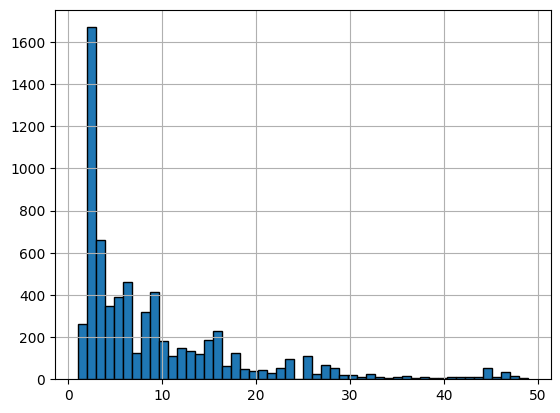

In [21]:
finetune["len_func_body"].hist(bins=50,edgecolor='black')

In [27]:
all_data = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/data/data.parquet", engine="fastparquet")
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595334 entries, 0 to 595333
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   source_idx        595334 non-null  object
 1   contract_name     595334 non-null  object
 2   func_name         558117 non-null  object
 3   masked_contract   595334 non-null  object
 4   func_body         595334 non-null  object
 5   func_requirement  595334 non-null  object
dtypes: object(6)
memory usage: 27.3+ MB


In [ ]:
all

In [29]:
all_data.drop_duplicates(subset=["masked_contract", "func_body"], ignore_index=True, inplace=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346466 entries, 0 to 346465
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   source_idx        346466 non-null  object
 1   contract_name     346466 non-null  object
 2   func_name         328156 non-null  object
 3   masked_contract   346466 non-null  object
 4   func_body         346466 non-null  object
 5   func_requirement  346466 non-null  object
dtypes: object(6)
memory usage: 15.9+ MB


In [36]:
all_data.to_parquet("/home/hieuvd/lvdthieu/CodeGen/data/data/all_data.parquet", engine="fastparquet")

In [38]:
mask_func = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/data/mask_entire_function.parquet", engine="fastparquet")
mask_func.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595334 entries, 0 to 595333
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   source_idx        595334 non-null  object
 1   contract_name     595334 non-null  object
 2   func_name         558117 non-null  object
 3   masked_contract   595334 non-null  object
 4   function          595334 non-null  object
 5   func_requirement  595334 non-null  object
dtypes: object(6)
memory usage: 27.3+ MB


In [39]:
mask_func.drop_duplicates(subset=["masked_contract", "function"], ignore_index=True, inplace=True)
mask_func.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346466 entries, 0 to 346465
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   source_idx        346466 non-null  object
 1   contract_name     346466 non-null  object
 2   func_name         328156 non-null  object
 3   masked_contract   346466 non-null  object
 4   function          346466 non-null  object
 5   func_requirement  346466 non-null  object
dtypes: object(6)
memory usage: 15.9+ MB


In [40]:
mask_func.to_parquet("/home/hieuvd/lvdthieu/CodeGen/data/data/mask_entire_function.parquet", engine="fastparquet")

In [2]:
import pandas as pd
original = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/test/original.parquet", engine="fastparquet")
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10742 entries, 0 to 10741
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   contract_name  10742 non-null  object
 1   func_name      10742 non-null  object
 2   source_code    10742 non-null  object
 3   func_body      10742 non-null  object
 4   func_req       10742 non-null  object
dtypes: object(5)
memory usage: 419.7+ KB


In [2]:
import pandas as pd
duplicate_contract = pd.read_csv("/home/hieuvd/lvdthieu/CodeGen/duplicate_contract.csv")
duplicate_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248868 entries, 0 to 248867
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     248868 non-null  int64 
 1   contract_name  248868 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.8+ MB


In [4]:
duplicate_contract["contract_name"].value_counts().describe()

count     2019.000000
mean       123.263001
std       1800.894760
min          1.000000
25%          2.000000
50%          6.000000
75%         17.000000
max      52017.000000
Name: count, dtype: float64

In [2]:
import pandas as pd
data = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/data/only_mask_func_body.parquet", engine="fastparquet")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346466 entries, 0 to 346465
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   source_idx        346466 non-null  object
 1   contract_name     346466 non-null  object
 2   func_name         328156 non-null  object
 3   masked_contract   346466 non-null  object
 4   func_body         346466 non-null  object
 5   func_requirement  346466 non-null  object
dtypes: object(6)
memory usage: 15.9+ MB


In [3]:

len(data[["source_idx", "contract_name"]].drop_duplicates())

56420

In [3]:
import pandas as pd
contracts = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/contracts.parquet", engine="fastparquet")
contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267200 entries, 0 to 267199
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   source_idx       267200 non-null  object
 1   contract_name    267200 non-null  object
 2   contract_source  267200 non-null  object
dtypes: object(3)
memory usage: 6.1+ MB


In [4]:
barr = [1, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 4000]


In [5]:
count = dict(contracts["contract_source"].value_counts())

In [6]:
contracts["count"] = contracts["contract_source"].apply(lambda source: count[source])

In [12]:
contracts

,source_idx,contract_name,contract_source,count
0,0,ERC20Interface,contract ERC20Interface {\r\n function tota...,3809
1,0,ApproveAndCallFallBack,contract ApproveAndCallFallBack {\r\n funct...,3917
2,0,Owned,contract Owned {\r\n address public owner;\...,1598
3,0,Tangent,"contract Tangent is ERC20Interface, Owned {\r\...",1
4,0,TangentStake,contract TangentStake is Owned {\r\n // pre...,1
...,...,...,...,...
267195,94282,TeuToken,"contract TeuToken is StandardToken, Ownable{\r...",3
267196,94282,teuInitialTokenSale,contract teuInitialTokenSale is Ownable {\r\n\...,1
267197,94284,GodMode,contract GodMode {\r\n /// @dev Is the cont...,1
267198,94287,ERC20,"contract ERC20 is Context, IERC20 {\r\n usi...",358


In [13]:
contracts = contracts.sample(frac=1, ignore_index=True)

In [14]:
contracts

,source_idx,contract_name,contract_source,count
0,3511,Ownable,contract\tOwnable\t\t{\t\t\t\t\t\t\r\n\taddres...,54
1,71542,SCT,contract SCT is SafeMath{\r\n string public...,1
2,64689,ERC20Mintable,"contract ERC20Mintable is BaseToken, MinterRol...",4
3,4397,Context,contract Context {\n constructor () interna...,7
4,540,ERC20Interface,contract ERC20Interface {\r\n function tota...,3809
...,...,...,...,...
267195,76778,OfferToken,"contract OfferToken is LexDAORole, ERC20Burnab...",2
267196,85966,POXToken,contract POXToken {\r\n /*=================...,1
267197,75409,StandardToken,"contract StandardToken is ERC20, BasicToken {\...",271
267198,76113,ERC20Interface,contract ERC20Interface {\r\n function tota...,3809


In [16]:
contracts.drop_duplicates(subset=["contract_source"], ignore_index=True, inplace=True)
contracts

,source_idx,contract_name,contract_source,count
0,3511,Ownable,contract\tOwnable\t\t{\t\t\t\t\t\t\r\n\taddres...,54
1,71542,SCT,contract SCT is SafeMath{\r\n string public...,1
2,64689,ERC20Mintable,"contract ERC20Mintable is BaseToken, MinterRol...",4
3,4397,Context,contract Context {\n constructor () interna...,7
4,540,ERC20Interface,contract ERC20Interface {\r\n function tota...,3809
...,...,...,...,...
118658,60352,Vault,contract Vault is Transferable {\r\n \r\n ...,1
118659,50945,MyAdvancedToken,"contract MyAdvancedToken is owned, TokenERC20 ...",1
118660,80297,PayerInterface,contract PayerInterface {\r\n\tfunction totalS...,1
118661,22220,EarthToken,contract EarthToken is ERC20 {\r\n construc...,1


In [17]:
dis = []
for i in range(len(barr) - 1):
    dis.append(len(contracts[(contracts["count"]>barr[i]) & (contracts["count"]<=barr[i+1])]))

dis

[12310, 1772, 951, 458, 195, 82, 53, 27, 9, 6]

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
contract_overview = [
    {"range":"2-5","count": 12310},
    {"range":"6-10","count": 1772},
    {"range":"11-20","count": 951},
    {"range":"21-50","count": 458},
    {"range":"51-100","count": 195},
    {"range":"101-200","count": 82},
    {"range":"201-500","count": 53},
    {"range":"501-1000","count": 27},
    {"range":"1001-2000","count": 9},
    {"range":"2001-4000","count": 6}
]

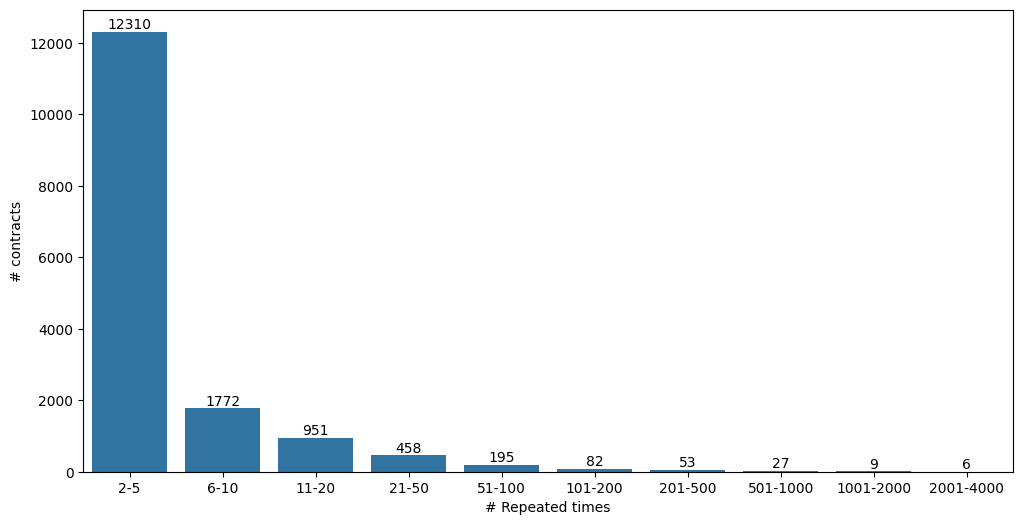

In [19]:
contract_overview = pd.DataFrame(contract_overview)

plt.figure(figsize=(12,6))
plt.ylabel("# contracts")
plt.xlabel("# Repeated times")
ax = sns.barplot(contract_overview, x="range", y="count")
for i in ax.containers:
    ax.bar_label(i,)

Thống kê trên 94k compilable solidity files extract được 267200 contracts trong đó 118663 contracts unique